<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Tensorflow_Exercises_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow - Models - Third Exercise (25 minutes)
@author Tomasz Skrzypczyk

Solved by Boguslaw Konefal

Tip: Google what you don't know how to do!!

In [ ]:
import tensorflow as tf
import numpy as np

Keras and TensorFlow 2.0 provide you with three methods to implement your own neural network architectures:

* Sequential API
* Functional API
* Model subclassing

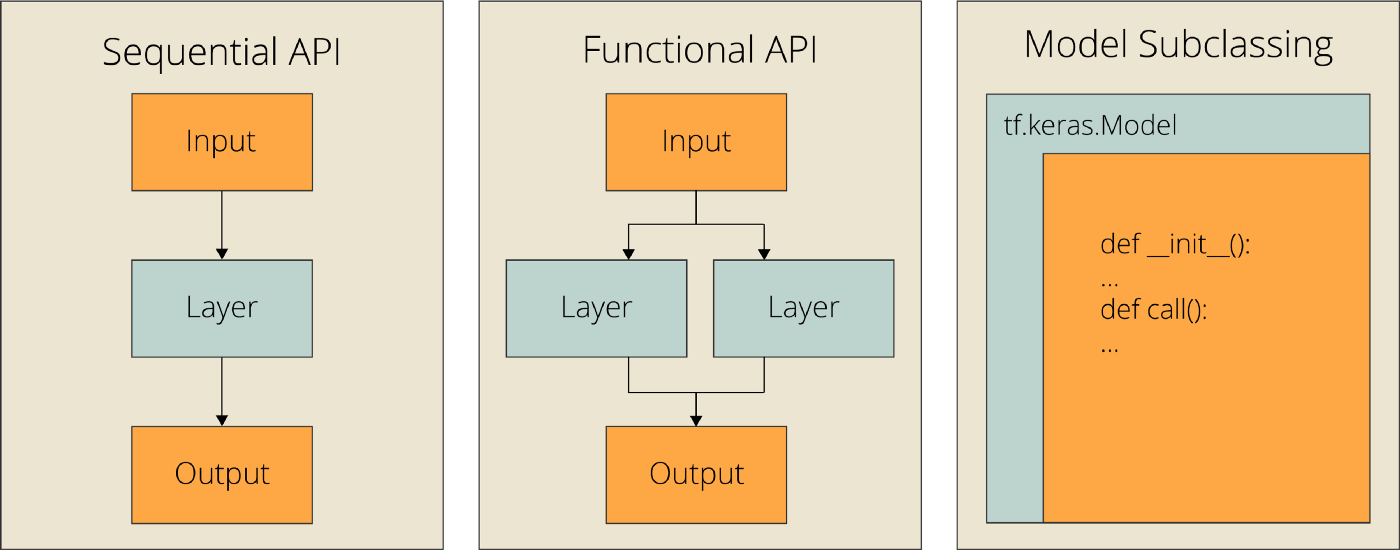

# Sequential API

We constract a model by passing its layers to the model.

In [ ]:
# Here are your layers:
layers = [tf.keras.layers.Dense(units=12, input_shape=(7,)), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.2)]

We construct a Sequential model simply by defining its list of layers. Basically the Sequential model works as a list. So you can create it in two ways:

First way - pass the list to the Sequential object

In [ ]:
model = tf.keras.Sequential(layers)

One important thing - the first layer must be either an Input, InputLayer or define the input_shape parameter!!!

Second way - create an empty model, and add layers by using the add method

In [ ]:
# Try yourself

model = tf.keras.Sequential()

# add your layers here:
model.add(tf.keras.layers.Dense(units=12, input_shape=(7,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



## Display the model's description and graph

Example:

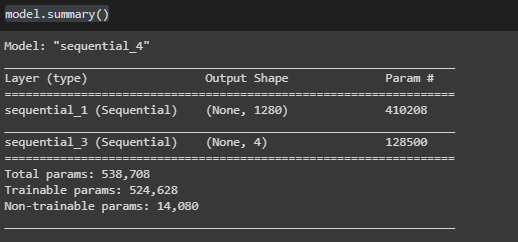

In [ ]:
# use the summary method on your model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                96        
                                                                 
 batch_normalization_1 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
Total params: 144
Trainable params: 120
Non-trainable params: 24
_________________________________________________________________


## Sequential API limitations

Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited — you **cannot** create models that:

* Share layers
* Have branches (at least not easily)
* Have multiple inputs
* Have multiple outputs

So it would be impossible to create this model:

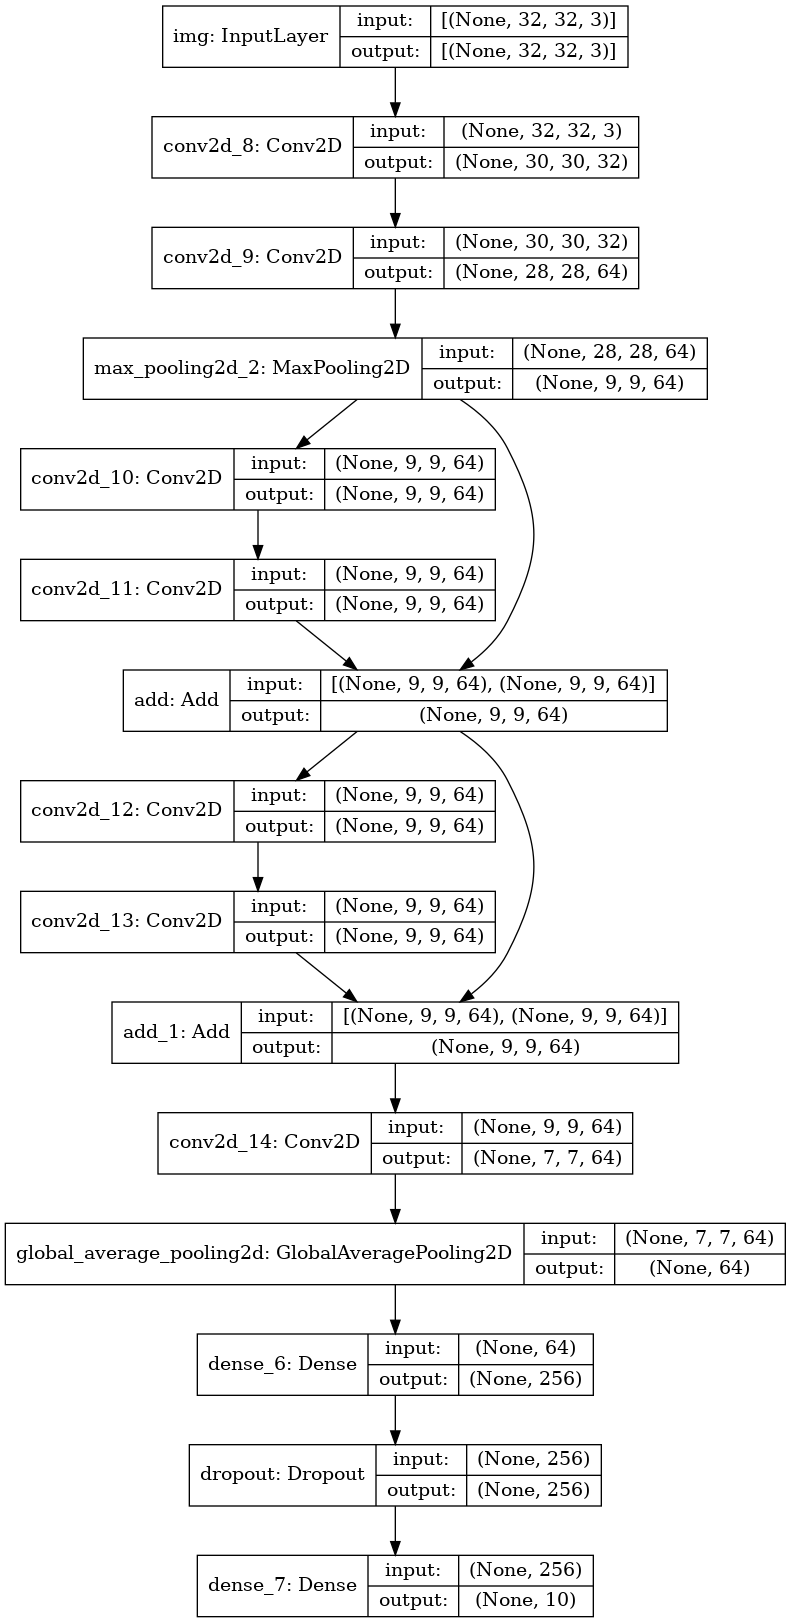

or this one:

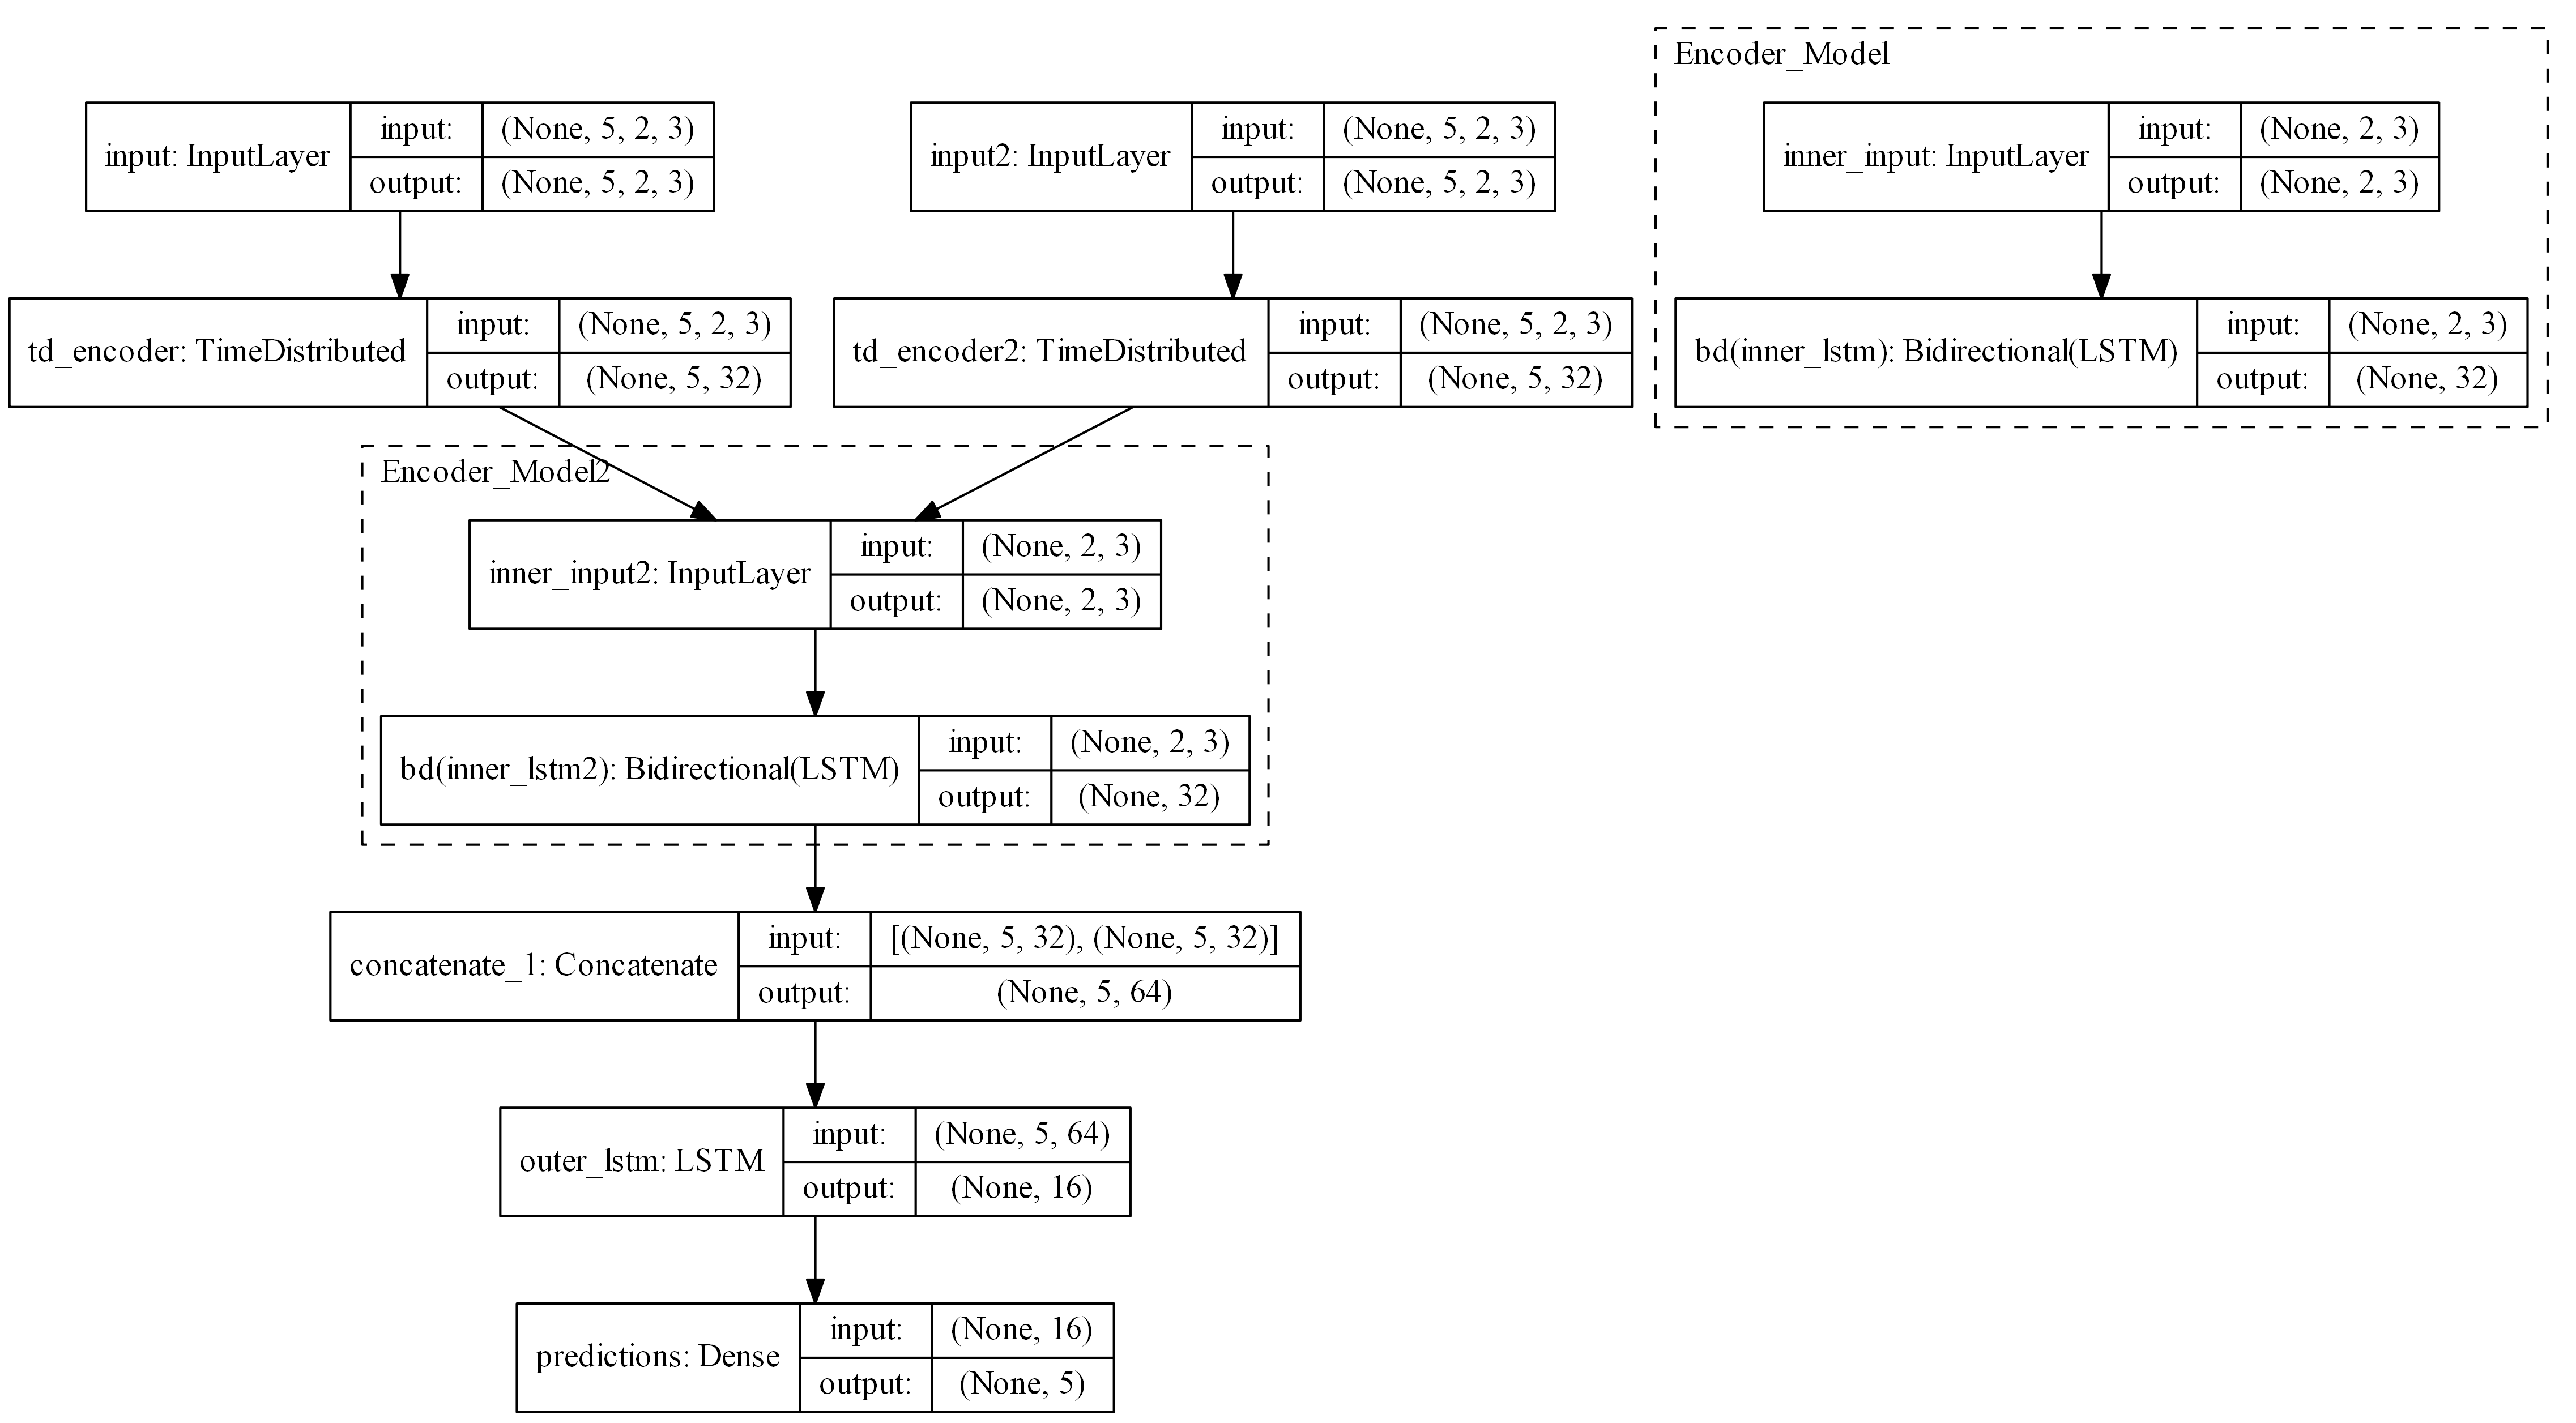

or that one:

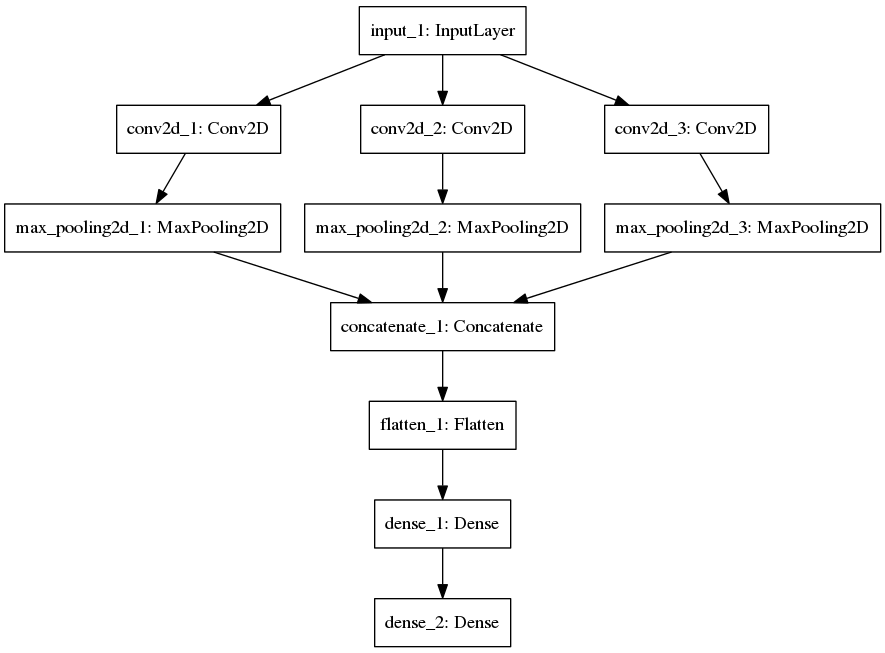

Or that one

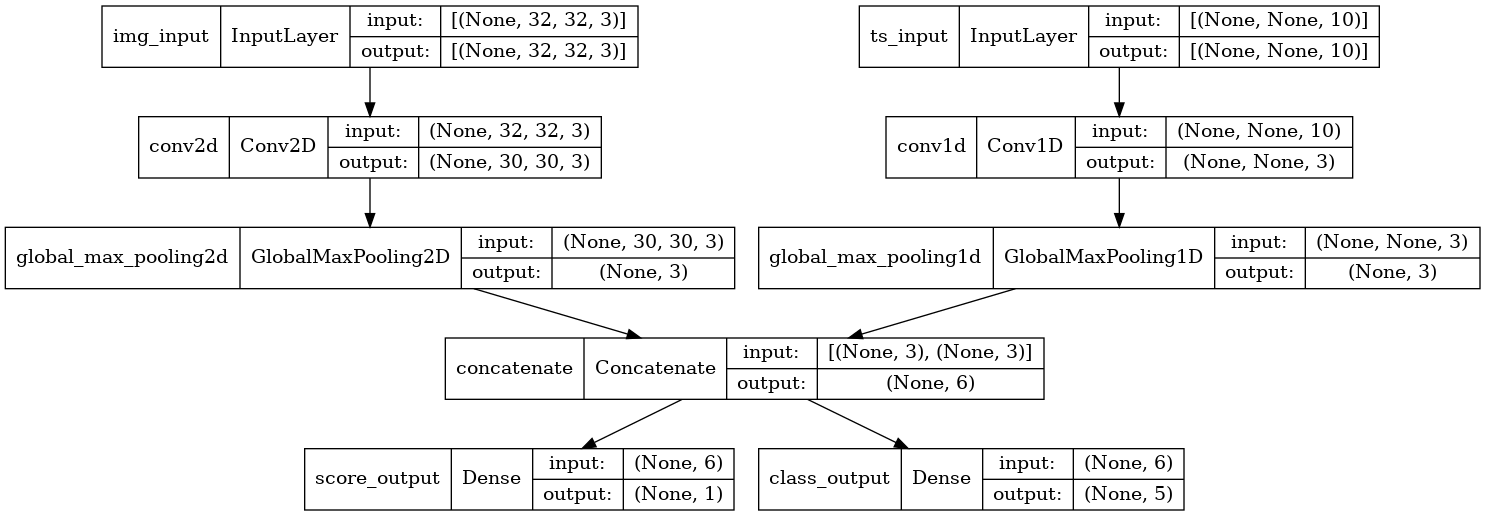

There is how to create such a plot:



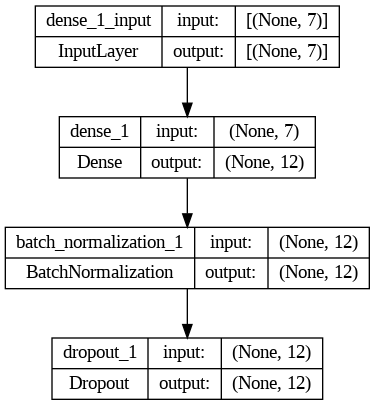

In [ ]:
# See the documentation and plot your model

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model


tf.keras.utils.plot_model(model,show_shapes=True)

# Functional API

Using the Functional API you can:

* Create more complex models.
* Have multiple inputs and multiple outputs.
* Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
* Design directed acyclic graphs (DAGs).
* Easily share layers inside the architecture.

Furthermore, any Sequential model can be implemented using Keras’ Functional API.

The idea:

```
first_layer = tf.keras.layers.Input(shape=(input data shape))
second_layer = tf.keras.layers.SomeLayer()(first_layer)
third_layer = tf.keras.layers.SomeLayer()(second_layer)
last_layer = tf.keras.layers.SomeLayer()(third_layer)

model = tf.keras.Model(inputs=[first_layer], outputs=[last_layer])

```


Basically, 

* each layer is assigned to a variable.

* First layer must be the Input (not InputLayer, this is different!).
 
* Each layer is being used as a function using the schema: `Layer(parameters)(previous_layer)`.

* you instantiate your model using `tf.keras.Model` object by passing ith first and last layer


Here's another example of Functional API model's definition. Don't bother if you don't know the layers that are used here, you will learn them later!

```

inputs = tf.keras.Input(shape=(parameters["shape"], parameters["shape"], 1))

conv2D = tf.keras.layers.Conv2D()(inputs)

maxPooling2D = tf.keras.layers.MaxPooling2D()(conv2D)

conv2D_2 =tf.keras.layers.Conv2D()(maxPooling2D)

maxPooling2D_2 = tf.keras.layers.MaxPooling2D()(conv2D_2)

flatten =   tf.keras.layers.Flatten()(maxPooling2D_2)

dropout = tf.keras.layers.Dropout()(flatten)

ouputs = tf.keras.layers.Dense()(dropout)


model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
```

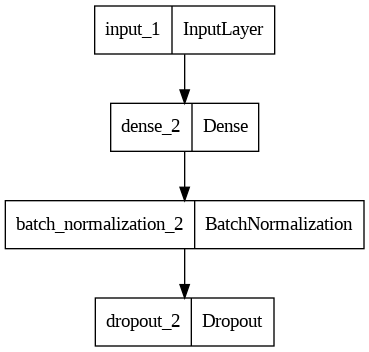

In [ ]:
# Try to rewrite your model using the Functional API
#model.add(tf.keras.layers.Dense(units=12, input_shape=(7,)))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))





input_layer =tf.keras.layers.Input(shape=(7,))
layer_1 = tf.keras.layers.Dense(units=12)(input_layer)
layer_2 = tf.keras.layers.BatchNormalization()(layer_1)
layer_3 = tf.keras.layers.Dropout(0.2)(layer_2)

model = tf.keras.Model(inputs=input_layer, outputs=[layer_3])


# print your model's summary to see if this is the same model as above

tf.keras.utils.plot_model(model)

# Models with multiple inputs

Don't worry if you don't know how to write models with multiple inputs and outputs.
Simply create more Input layers, pass them all to the model's definition when you instantiate your model

## Example
```
model = tf.keras.Model(inputs = [input_1, input_2], outputs = [output])
```

Or if you wish to have multiple outputs:

## Example

```
model = tf.keras.Model(inputs = [input_1], outputs = [output_1, output_2])
```

Remember that you have to connect each layer (apart form the Input layer) with it's previous layer.

```
next_layer = Layer()(previous_layer)
```

Task:

Define the following model:

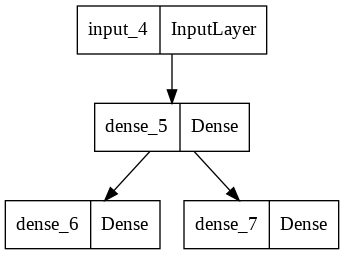

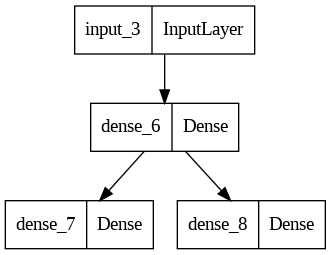

In [ ]:
# Your code


input_1 = tf.keras.layers.Input(shape=(15,))
dense_1 = tf.keras.layers.Dense(1)(input_1)
dense_2 = tf.keras.layers.Dense(1)(dense_1)
dense_3 = tf.keras.layers.Dense(1)(dense_1)

model = tf.keras.Model(inputs=input_1, outputs=[dense_2, dense_3])

tf.keras.utils.plot_model(model)

Task Define the following model:

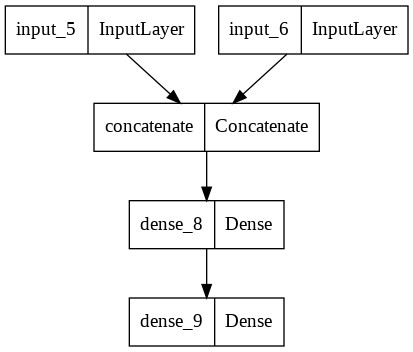

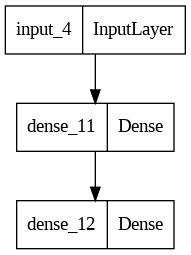

In [ ]:
# Your code

input_1 = tf.keras.layers.Input(shape=(5,), name='input_1')
input_2 = tf.keras.layers.Input(shape=(5,), name='input_2')
concat = tf.keras.layers.Concatenate()([input_1, input_2])
dense_1 = tf.keras.layers.Dense(1)(concat)
dense_2 = tf.keras.layers.Dense(1)(dense_1)


model =  tf.keras.Model(inputs=concat, outputs=dense_2)

tf.keras.utils.plot_model(model)